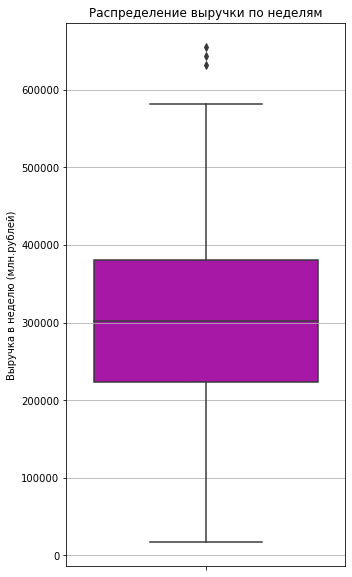

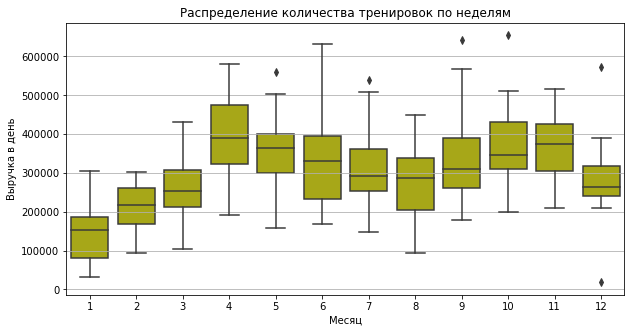

In [5]:
### Задача
#Понять, как распределена выручка по неделям

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


payments = pd.read_excel('payments.xlsx')
payments




plt.figure(figsize = (5, 10))  # Зададим размер фигуры
plt.title('Распределение выручки по неделям') # Подпишем заголовок графика
plt.grid() # Добавим сетку
#отрисовываем ящик с усами


revenue_per_week = payments.groupby([payments['payment_date'].dt.day,
                                        payments['payment_date'].dt.isocalendar().week])['amount'].sum()

sns.boxplot(y = revenue_per_week, 
            color='m')
plt.ylabel('Выручка в неделю (млн.рублей)') # Подпишем ось Y
plt.show()

#Мы видим несколько выбросов внизу — это значит, что есть  недели с аномально низкой выручкой, менее 1 млн.рублей. 
revenue_per_week.loc[revenue_per_week<1]

#Посмотрим на выручку в день в каждом месяце.
revenue_byday_month = payments.groupby([payments['payment_date'].dt.day,
                                        payments['payment_date'].dt.month])['amount'].sum()
revenue_byday_month.index.names = ['day','month'] # группировка создает мультииндекс.
revenue_byday_month = revenue_byday_month.reset_index() 
revenue_byday_month.head()

plt.figure(figsize=(10, 5))  # Зададим размер фигуры
plt.title('Распределение количества тренировок по неделям') # Подпишем заголовок графика
plt.grid() # Добавим сетку
#отрисовываем график
sns.boxplot(x='month',
            y='amount',
            data=revenue_byday_month, 
            color='y')
plt.ylabel('Выручка в день') # Подпишем ось Y
plt.xlabel('Месяц') # Подпишем ось Y
plt.show()

#Мы видим, что в отдельные месяцы тоже есть дни, которые ведут себя сильно лучше или хуже остальных. Возможно, такие дни стоит исключить из анализа выручки или обучающих данных для моделей, 
#предсказывающих выручку.